In [10]:
import numpy as np
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt

## Step 0: Data verification

In [11]:
path = "C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta1unitrange.csv"
test_df = pd.read_csv(path)
test_df = test_df.drop(columns=['Unnamed: 0','id'])
test_df

,val_index,size,valuation,algo,distortion
0,1,5,theta1unitrange,serial_dictatorship,1.154869
1,1,5,theta1unitrange,ttc_matching,1.023176
2,1,5,theta1unitrange,epsilon_max_matching 1,1.000000
3,1,5,theta1unitrange,epsilon_max_matching 0.1,1.000000
4,1,5,theta1unitrange,modified_max_matching,1.023176
...,...,...,...,...,...
2995,500,100,theta1unitrange,ttc_matching,1.114783
2996,500,100,theta1unitrange,epsilon_max_matching 1,1.069636
2997,500,100,theta1unitrange,epsilon_max_matching 0.1,1.005546
2998,500,100,theta1unitrange,modified_max_matching,1.135643


In [12]:
test_df.isna().to_numpy().any() #check for nans

False

In [13]:
test_df[test_df['distortion'] < 0.99] #check for bad values

,val_index,size,valuation,algo,distortion


In [14]:
algorithms = set(test_df['algo'])
df_list = {}
for algorithm in algorithms:
    df_list[algorithm] = test_df[test_df['algo']==algorithm]
    
for (key, index) in [(key, df_list[key]['distortion'].argmax()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                      66
size                            5
valuation         theta1unitrange
algo          serial_dictatorship
distortion                1.94843
Name: 390, dtype: object
val_index                  71
size                        5
valuation     theta1unitrange
algo             ttc_matching
distortion            1.84651
Name: 421, dtype: object
val_index                         32
size                               5
valuation            theta1unitrange
algo          epsilon_max_matching 1
distortion                   1.12531
Name: 188, dtype: object
val_index                          276
size                                20
valuation              theta1unitrange
algo          epsilon_max_matching 0.1
distortion                     1.01136
Name: 1653, dtype: object
val_index                              36
size                                    5
valuation                 theta1unitrange
algo          updated_hybrid_max_matching
distortion                     

In [15]:
test_df[(test_df['algo']=='epsilon_max_matching pareto1') & (test_df['distortion'] > 2)]

,val_index,size,valuation,algo,distortion


In [16]:
test_df[(test_df['algo']=='epsilon_max_matching pareto0.1') & (test_df['distortion'] > 1.1)]

,val_index,size,valuation,algo,distortion


## Step 1: Data collection

In [17]:
path = "C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata"
data_files = [path+"/"+item for item in os.listdir(path) if 'instances' not in item and 'fair' not in item and 'max' not in item]

data_files

['C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsum.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta1unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta1unitsum.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta5unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta5unitsum.csv']

In [18]:
df_list = []

for item in data_files:
    if 'fair' not in item and 'max' not in item: # filter for pareto only
        df_list.append(pd.read_csv(item))
    else:
        temp_df = pd.read_csv(item)
              
        temp_df = temp_df[~temp_df['algo'].isin(['ttc_matching','serial_dictatorship'])]
        
        if 'range' in item:
            if 'rangefair' in item:
                to_append = 'fair'
            elif 'rangemaxcard' in item:
                to_append = 'maxcard'
            elif 'rangermax' in item:
                to_append = 'rmax'
            
        temp_df.loc[temp_df.algo == 'modified_max_matching', 'algo'] = 'modified_max_matching '+to_append
        
        print(item, set(temp_df['algo']))
        
        df_list.append(temp_df)
    
df = pd.concat(df_list)
df.index = list(range(len(df)))
df = df.drop(columns=['Unnamed: 0','id'])
df = df[~pd.isna(df['val_index'])]
df

,val_index,size,valuation,algo,distortion
0,1,5,theta0.2unitrange,serial_dictatorship,1.095171
1,1,5,theta0.2unitrange,ttc_matching,1.029723
2,1,5,theta0.2unitrange,epsilon_max_matching 1,1.013552
3,1,5,theta0.2unitrange,epsilon_max_matching 0.1,1.000000
4,1,5,theta0.2unitrange,modified_max_matching,1.136526
...,...,...,...,...,...
17995,500,100,theta5unitsum,ttc_matching,1.112244
17996,500,100,theta5unitsum,epsilon_max_matching 1,1.069315
17997,500,100,theta5unitsum,epsilon_max_matching 0.1,1.005004
17998,500,100,theta5unitsum,modified_max_matching,1.110327


In [19]:
df.loc[(df.val_index.isin(range(1,101))), 'size'] = 5.0
df.loc[(df.val_index.isin(range(101,201))), 'size'] = 10.0
df.loc[(df.val_index.isin(range(201,301))), 'size'] = 20.0
df.loc[(df.val_index.isin(range(301,401))), 'size'] = 50.0
df.loc[(df.val_index.isin(range(401,501))), 'size'] = 100.0
df

,val_index,size,valuation,algo,distortion
0,1,5,theta0.2unitrange,serial_dictatorship,1.095171
1,1,5,theta0.2unitrange,ttc_matching,1.029723
2,1,5,theta0.2unitrange,epsilon_max_matching 1,1.013552
3,1,5,theta0.2unitrange,epsilon_max_matching 0.1,1.000000
4,1,5,theta0.2unitrange,modified_max_matching,1.136526
...,...,...,...,...,...
17995,500,100,theta5unitsum,ttc_matching,1.112244
17996,500,100,theta5unitsum,epsilon_max_matching 1,1.069315
17997,500,100,theta5unitsum,epsilon_max_matching 0.1,1.005004
17998,500,100,theta5unitsum,modified_max_matching,1.110327


In [20]:
df = df[df['distortion'] > 0.99]
algorithms = set(df['algo'])
df_list = {}
for algorithm in algorithms:
    df_list[algorithm] = df[df['algo']==algorithm]

In [21]:
df_list.keys()

dict_keys(['serial_dictatorship', 'ttc_matching', 'epsilon_max_matching 1', 'epsilon_max_matching 0.1', 'updated_hybrid_max_matching', 'modified_max_matching'])

In [22]:
for key in df_list.keys():
    print(key, df_list[key]['distortion'].argmax())

serial_dictatorship 1505
ttc_matching 2072
epsilon_max_matching 1 2563
epsilon_max_matching 0.1 1275
updated_hybrid_max_matching 30
modified_max_matching 1535


## Maxima and minima analysis

In [23]:
for (key, index) in [(key, df_list[key]['distortion'].argmax()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                       6
size                            5
valuation           theta1unitsum
algo          serial_dictatorship
distortion                2.01013
Name: 9030, dtype: object
val_index                  73
size                        5
valuation     theta5unitrange
algo             ttc_matching
distortion            1.94566
Name: 12433, dtype: object
val_index                         64
size                               5
valuation              theta5unitsum
algo          epsilon_max_matching 1
distortion                   1.15335
Name: 15380, dtype: object
val_index                          276
size                                20
valuation              theta1unitrange
algo          epsilon_max_matching 0.1
distortion                     1.01136
Name: 7653, dtype: object
val_index                              31
size                                    5
valuation               theta0.2unitrange
algo          updated_hybrid_max_matching
distortion                

In [24]:
for (key, index) in [(key, df_list[key]['distortion'].argmin()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                      53
size                            5
valuation       theta0.2unitrange
algo          serial_dictatorship
distortion                      1
Name: 312, dtype: object
val_index                    33
size                          5
valuation     theta0.2unitrange
algo               ttc_matching
distortion                    1
Name: 193, dtype: object
val_index                         95
size                               5
valuation            theta0.2unitsum
algo          epsilon_max_matching 1
distortion                         1
Name: 3566, dtype: object
val_index                          218
size                                20
valuation            theta0.2unitrange
algo          epsilon_max_matching 0.1
distortion                           1
Name: 1305, dtype: object
val_index                              36
size                                    5
valuation               theta0.2unitrange
algo          updated_hybrid_max_matching
distortion          

In [25]:
#TODO write a function for generating plots so you don't have to do this in future
templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).mean()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_avg = pd.concat(templist)
df_avg.index = list(range(len(df_avg)))
df_avg

templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).var()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_var = pd.concat(templist)
df_var.index = list(range(len(df_var)))
df_var

templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).min()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_min = pd.concat(templist)
df_min.index = list(range(len(df_min)))
df_min

templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).max()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_max = pd.concat(templist)
df_max.index = list(range(len(df_max)))
df_max

,algo,distortion,size,valuation
0,serial_dictatorship,1.467590,5,theta0.2unitrange
1,serial_dictatorship,1.630561,5,theta0.2unitsum
2,serial_dictatorship,1.948429,5,theta1unitrange
3,serial_dictatorship,2.010126,5,theta1unitsum
4,serial_dictatorship,1.945662,5,theta5unitrange
...,...,...,...,...
175,modified_max_matching,1.516853,100,theta0.2unitsum
176,modified_max_matching,1.150918,100,theta1unitrange
177,modified_max_matching,1.182679,100,theta1unitsum
178,modified_max_matching,1.125141,100,theta5unitrange


## Graphs of data


### unit-sum, $\theta=0.2$

In [40]:
curr = df_avg[(df_avg['valuation']=='theta0.2unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000077,1.014380,1.113397,1.103311,1.766594
10,1.000409,1.024504,1.132539,1.131448,1.785624
20,1.000720,1.037061,1.130639,1.130737,1.775217
50,1.001667,1.048533,1.157852,1.157392,1.628591
100,1.002302,1.082601,1.155667,1.157938,1.437769


<AxesSubplot:title={'center':'unit-sum, theta=0.2, mean'}, xlabel='size'>

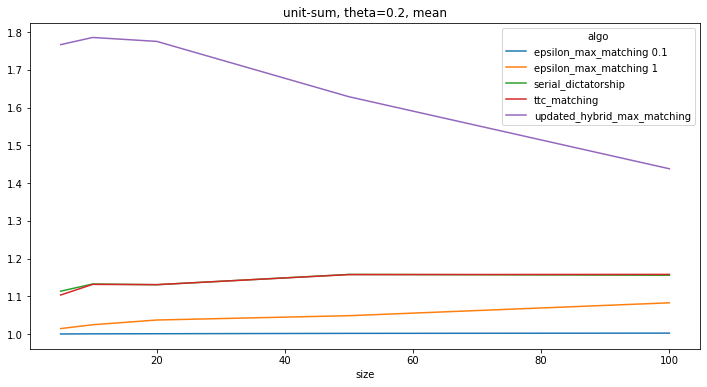

In [41]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, mean')

In [42]:
curr = df_var[(df_var['valuation']=='theta0.2unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,4.546073e-07,0.000522,0.020270,0.012645,0.407140
10,1.581512e-06,0.000484,0.007711,0.005813,0.084362
20,1.069375e-06,0.000279,0.002609,0.001636,0.041986
50,1.443885e-06,0.000164,0.000517,0.000595,0.006806
100,7.735288e-07,0.000102,0.000199,0.000175,0.000704


<AxesSubplot:title={'center':'unit-sum, theta=0.2, variance'}, xlabel='size'>

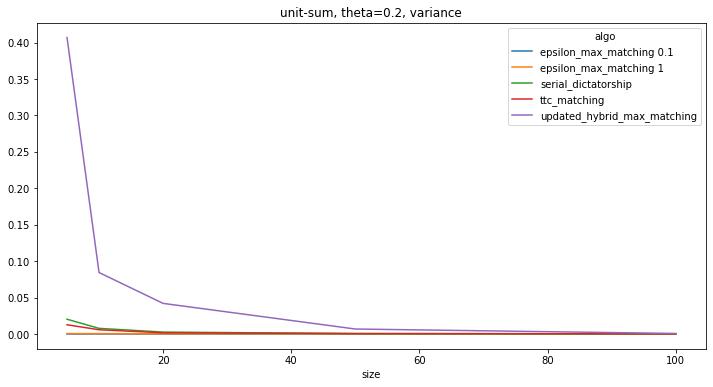

In [43]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, variance')

In [44]:
curr = df_min[(df_min['valuation']=='theta0.2unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.000000,1.001217,1.270609
20,1.000000,1.003739,1.030305,1.045190,1.381783
50,1.000000,1.019617,1.113525,1.116406,1.436414
100,1.000426,1.061180,1.119129,1.123231,1.387257


<AxesSubplot:title={'center':'unit-sum, theta=0.2, min'}, xlabel='size'>

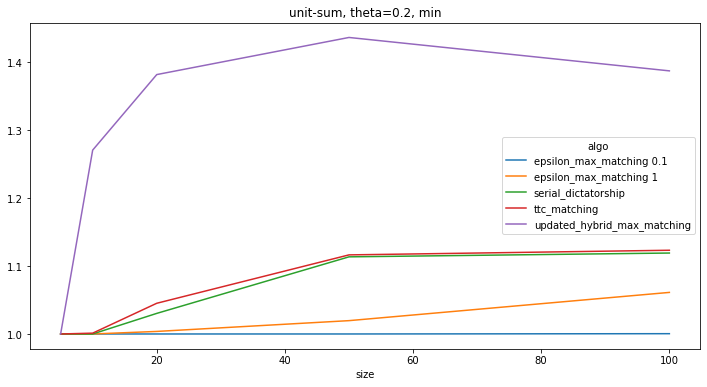

In [45]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, min')

In [46]:
curr = df_max[(df_max['valuation']=='theta0.2unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.006671,1.091326,1.630561,1.452860,4.559648
10,1.007533,1.085906,1.458024,1.355175,2.893442
20,1.005928,1.093664,1.302360,1.240658,2.427388
50,1.004711,1.088650,1.206179,1.270660,1.881628
100,1.005044,1.113179,1.186658,1.196102,1.497435


<AxesSubplot:title={'center':'unit-sum, theta=0.2, max'}, xlabel='size'>

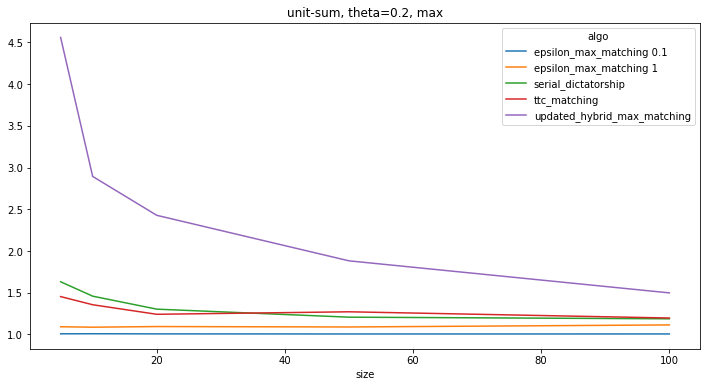

In [47]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, max')

### unit-sum, $\theta=1$


In [48]:
curr = df_avg[(df_avg['valuation']=='theta1unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000367,1.016904,1.197781,1.206960,1.523197
10,1.000678,1.034105,1.228371,1.241384,1.460259
20,1.001098,1.061529,1.217554,1.216560,1.343252
50,1.002529,1.078628,1.167568,1.167253,1.224032
100,1.004712,1.083725,1.127059,1.126624,1.154093


<AxesSubplot:title={'center':'unit-sum, theta=1, mean'}, xlabel='size'>

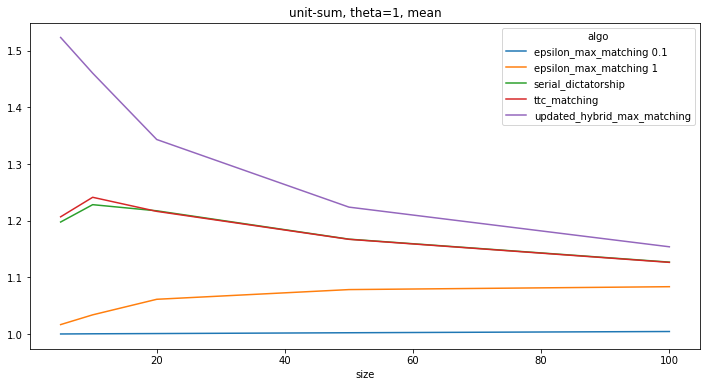

In [49]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, mean')

In [50]:
curr = df_var[(df_var['valuation']=='theta1unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,0.000002,0.000764,0.032485,0.029721,0.157864
10,0.000002,0.000836,0.011464,0.009746,0.030322
20,0.000002,0.000439,0.002527,0.002540,0.004929
50,0.000002,0.000146,0.000332,0.000336,0.000376
100,0.000001,0.000051,0.000084,0.000070,0.000086


<AxesSubplot:title={'center':'unit-sum, theta=1, var'}, xlabel='size'>

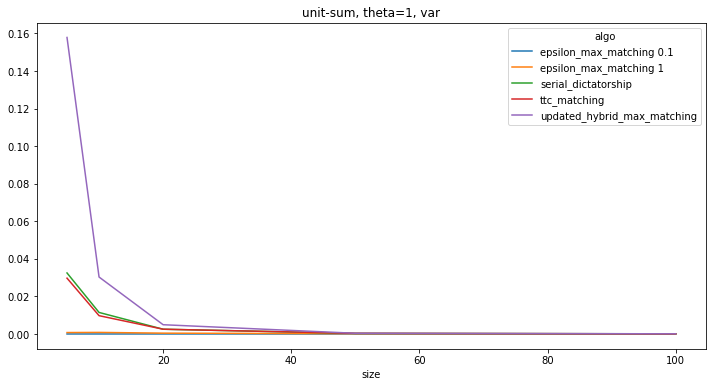

In [51]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, var')

In [52]:
curr = df_min[(df_min['valuation']=='theta1unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.00000,1.000000,1.000000,1.000000,1.000000
10,1.00000,1.000000,1.007308,1.045908,1.107846
20,1.00000,1.012308,1.116073,1.120697,1.193931
50,1.00004,1.057037,1.119809,1.125229,1.175306
100,1.00235,1.067649,1.107952,1.108247,1.132548


<AxesSubplot:title={'center':'unit-sum, theta=1, min'}, xlabel='size'>

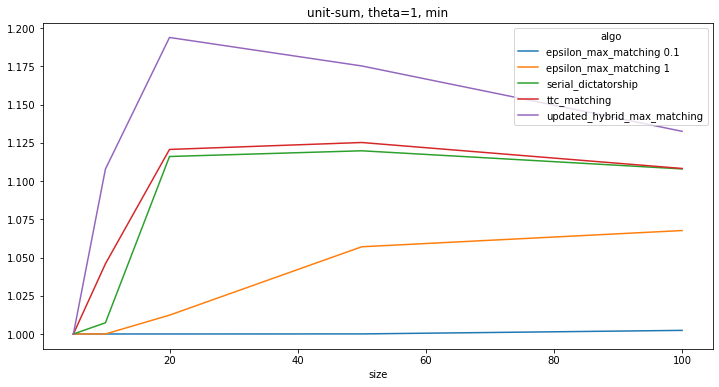

In [53]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, min')

In [54]:
curr = df_max[(df_max['valuation']=='theta1unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.008974,1.115494,2.010126,1.729735,3.402051
10,1.006263,1.144049,1.482294,1.549309,1.996984
20,1.006533,1.106596,1.354913,1.349504,1.542042
50,1.006247,1.114192,1.217119,1.225305,1.265618
100,1.007651,1.098716,1.151085,1.145609,1.180975


<AxesSubplot:title={'center':'unit-sum, theta=1, max'}, xlabel='size'>

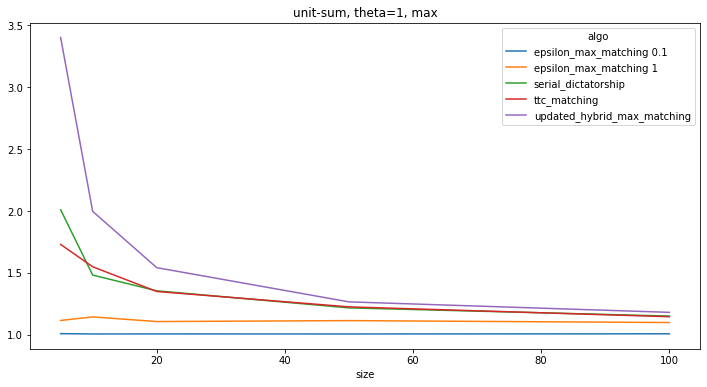

In [55]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, max')

### unit-sum, $\theta = 5$

In [56]:
curr = df_avg[(df_avg['valuation']=='theta5unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000345,1.022623,1.273258,1.286211,1.272856
10,1.001362,1.043602,1.274277,1.262205,1.255675
20,1.002169,1.066368,1.222684,1.225562,1.228065
50,1.004951,1.067015,1.160295,1.159726,1.160801
100,1.005916,1.071349,1.120050,1.120325,1.120100


<AxesSubplot:title={'center':'unit-sum, theta=5, mean'}, xlabel='size'>

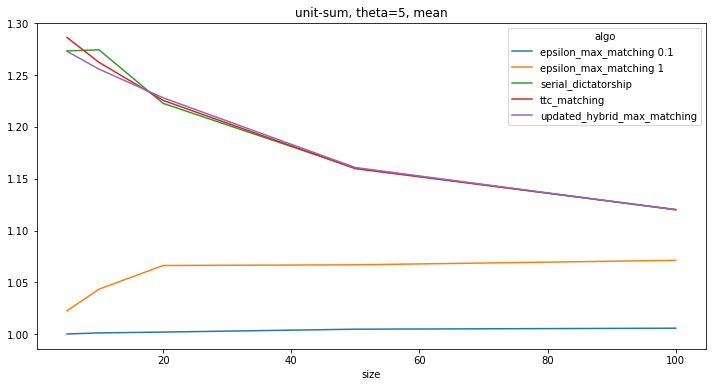

In [57]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, mean')

In [58]:
curr = df_var[(df_var['valuation']=='theta5unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,0.000002,0.001108,0.025861,0.031168,0.022694
10,0.000006,0.000584,0.010502,0.008921,0.008567
20,0.000005,0.000441,0.001478,0.001609,0.002113
50,0.000003,0.000104,0.000272,0.000281,0.000287
100,0.000001,0.000032,0.000059,0.000075,0.000078


<AxesSubplot:title={'center':'unit-sum, theta=5, var'}, xlabel='size'>

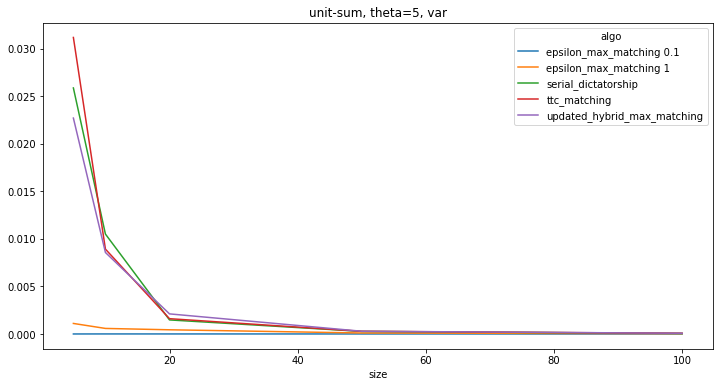

In [59]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, var')

In [60]:
curr = df_min[(df_min['valuation']=='theta5unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.005380,1.034222
10,1.000000,1.000000,1.063705,1.067677,1.084383
20,1.000000,1.019392,1.153915,1.120828,1.127006
50,1.000741,1.039437,1.121456,1.121122,1.122378
100,1.003577,1.058217,1.106337,1.106180,1.099825


<AxesSubplot:title={'center':'unit-sum, theta=5, min'}, xlabel='size'>

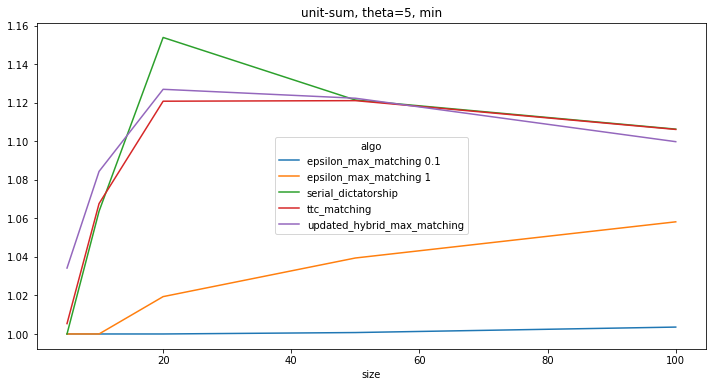

In [61]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, min')

In [62]:
curr = df_max[(df_max['valuation']=='theta5unitsum')]
curr = curr[curr['algo']!='modified_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.007376,1.153353,1.712564,1.767633,1.709732
10,1.010423,1.103873,1.517053,1.527456,1.564043
20,1.009004,1.111114,1.311963,1.319888,1.324182
50,1.009480,1.095569,1.193442,1.196670,1.219478
100,1.008646,1.084140,1.139377,1.143807,1.143784


<AxesSubplot:title={'center':'unit-sum, theta=5, max'}, xlabel='size'>

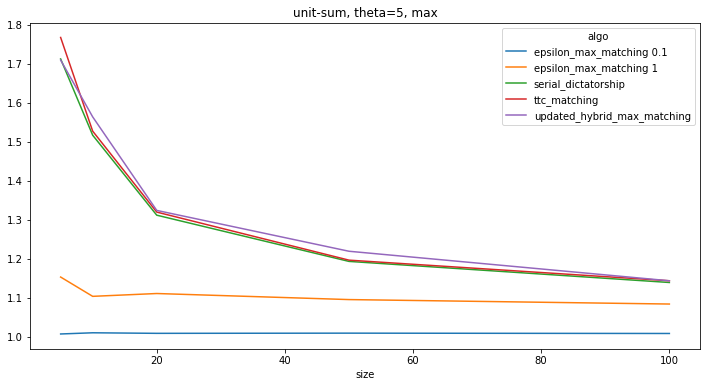

In [63]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, max')

### unit-range, $\theta=0.2$

In [64]:
curr = df_avg[(df_avg['valuation']=='theta0.2unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000191,1.009514,1.041035,1.129814,1.113549
10,1.000486,1.022989,1.085395,1.116989,1.120919
20,1.001170,1.039169,1.215452,1.134080,1.132484
50,1.001496,1.061062,1.383886,1.158807,1.156536
100,1.002374,1.086965,1.340023,1.149103,1.149608


<AxesSubplot:title={'center':'unit-range, theta=0.2, mean'}, xlabel='size'>

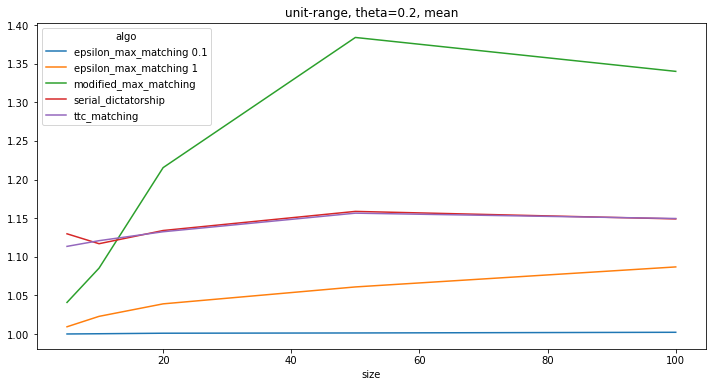

In [65]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, mean')

In [66]:
curr = df_var[(df_var['valuation']=='theta0.2unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.271596e-06,0.000355,0.003819,0.015222,0.016494
10,1.651323e-06,0.000385,0.003416,0.004656,0.004535
20,2.678601e-06,0.000371,0.004271,0.002054,0.001483
50,8.682330e-07,0.000135,0.002495,0.000491,0.000578
100,7.939280e-07,0.000092,0.000659,0.000156,0.000155


<AxesSubplot:title={'center':'unit-range, theta=0.2, var'}, xlabel='size'>

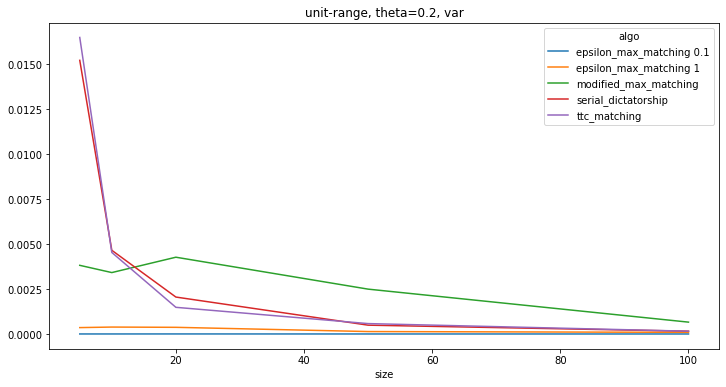

In [67]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, var')

In [68]:
curr = df_min[(df_min['valuation']=='theta0.2unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.000000,1.000000,1.000000
20,1.000000,1.003025,1.075205,1.013042,1.051763
50,1.000000,1.034049,1.260690,1.095789,1.104850
100,1.000229,1.066022,1.271754,1.113841,1.118001


<AxesSubplot:title={'center':'unit-range, theta=0.2, min'}, xlabel='size'>

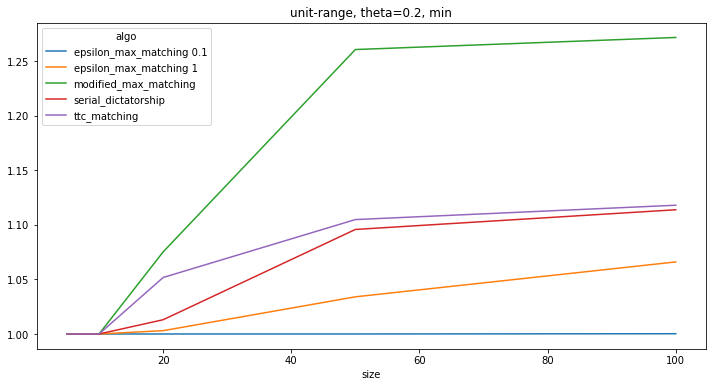

In [69]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, min')

In [70]:
curr = df_max[(df_max['valuation']=='theta0.2unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.008363,1.102183,1.353274,1.467590,1.601767
10,1.007002,1.070089,1.259719,1.309631,1.320409
20,1.009114,1.094225,1.415463,1.275733,1.274061
50,1.004741,1.088415,1.516079,1.210326,1.227388
100,1.004522,1.111775,1.412852,1.180306,1.181293


<AxesSubplot:title={'center':'unit-range, theta=0.2, max'}, xlabel='size'>

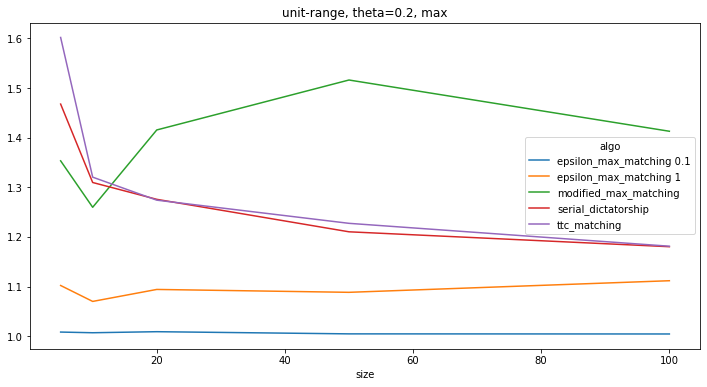

In [71]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, max')

### unit-range, $\theta=1$

In [72]:
curr = df_avg[(df_avg['valuation']=='theta1unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000147,1.014257,1.062436,1.171343,1.193206
10,1.000736,1.033383,1.154464,1.218081,1.214625
20,1.001135,1.051732,1.212597,1.201616,1.211214
50,1.002786,1.071569,1.175724,1.151888,1.151091
100,1.004827,1.071567,1.130182,1.114500,1.115681


<AxesSubplot:title={'center':'unit-range, theta=1, mean'}, xlabel='size'>

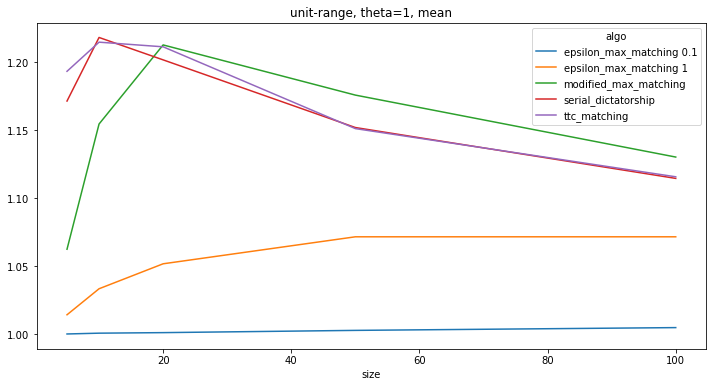

In [73]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, mean')

In [74]:
curr = df_var[(df_var['valuation']=='theta1unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,6.911336e-07,0.000774,0.005488,0.031345,0.032785
10,2.257555e-06,0.000703,0.005581,0.008766,0.007429
20,2.924476e-06,0.000311,0.002461,0.001572,0.002714
50,1.310506e-06,0.000133,0.000319,0.000301,0.000263
100,1.359343e-06,0.000025,0.000068,0.000047,0.000057


<AxesSubplot:title={'center':'unit-range, theta=1, var'}, xlabel='size'>

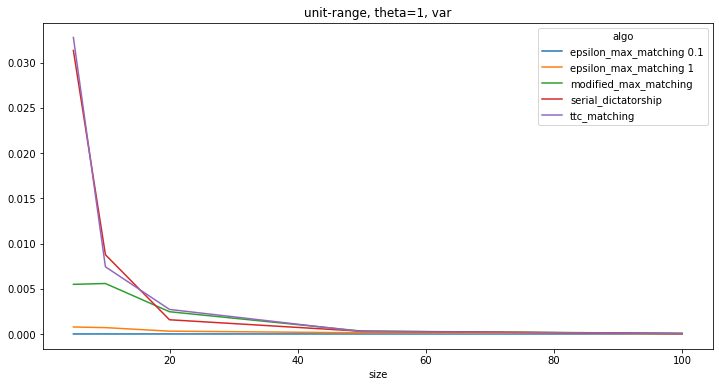

In [75]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, var')

In [76]:
curr = df_min[(df_min['valuation']=='theta1unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.023667,1.020221,1.023630
20,1.000000,1.015779,1.103633,1.129334,1.100803
50,1.000483,1.038269,1.131275,1.105165,1.121120
100,1.001646,1.061337,1.114119,1.098851,1.093708


<AxesSubplot:title={'center':'unit-range, theta=1, min'}, xlabel='size'>

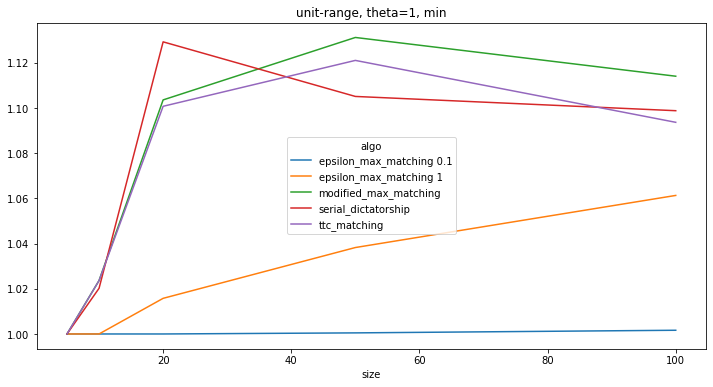

In [77]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, min')

In [78]:
curr = df_max[(df_max['valuation']=='theta1unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.007571,1.125314,1.315014,1.948429,1.846510
10,1.007972,1.109549,1.433121,1.533403,1.528638
20,1.011356,1.114766,1.368473,1.332266,1.370186
50,1.005823,1.098546,1.219862,1.195611,1.200889
100,1.007554,1.084097,1.150918,1.138109,1.132258


<AxesSubplot:title={'center':'unit-range, theta=1, max'}, xlabel='size'>

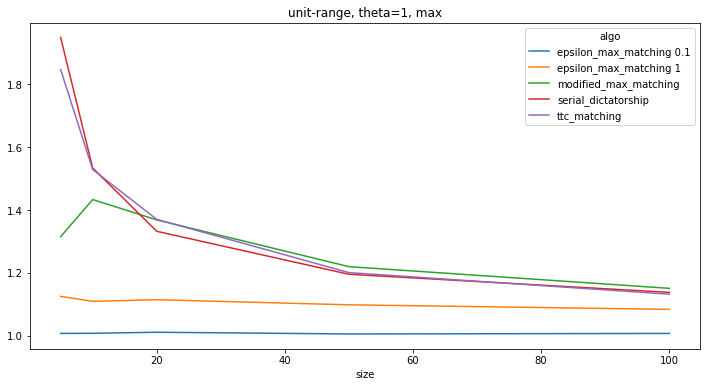

In [79]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, max')

### unit-range, $\theta = 5$

In [80]:
curr = df_avg[(df_avg['valuation']=='theta5unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000440,1.022274,1.110364,1.267539,1.287341
10,1.001010,1.044038,1.152759,1.249723,1.242614
20,1.002183,1.063514,1.170713,1.197352,1.204579
50,1.005006,1.065123,1.135737,1.144898,1.143842
100,1.006287,1.060992,1.102368,1.108228,1.106667


<AxesSubplot:title={'center':'unit-range, theta=5, mean'}, xlabel='size'>

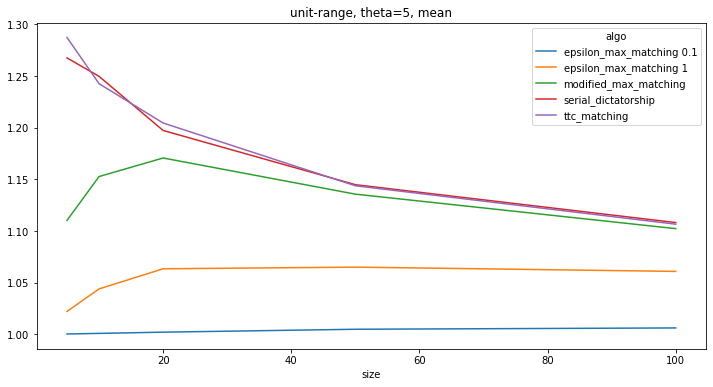

In [81]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, mean')

In [82]:
curr = df_var[(df_var['valuation']=='theta5unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,2.355531e-06,0.000906,0.007093,0.030651,0.023537
10,2.854062e-06,0.000556,0.003996,0.008799,0.004766
20,3.751500e-06,0.000332,0.001361,0.001625,0.001440
50,1.900768e-06,0.000056,0.000186,0.000223,0.000162
100,9.140697e-07,0.000028,0.000049,0.000045,0.000045


<AxesSubplot:title={'center':'unit-range, theta=5, var'}, xlabel='size'>

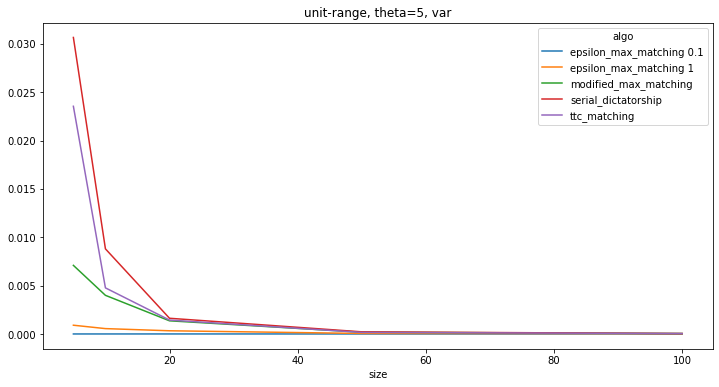

In [83]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, var')

In [84]:
curr = df_min[(df_min['valuation']=='theta5unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.020178
10,1.000000,1.000000,1.026760,1.085706,1.112652
20,1.000000,1.019610,1.083659,1.117844,1.115759
50,1.001997,1.047416,1.094172,1.108825,1.104403
100,1.003885,1.050314,1.084063,1.093278,1.090044


<AxesSubplot:title={'center':'unit-range, theta=5, min'}, xlabel='size'>

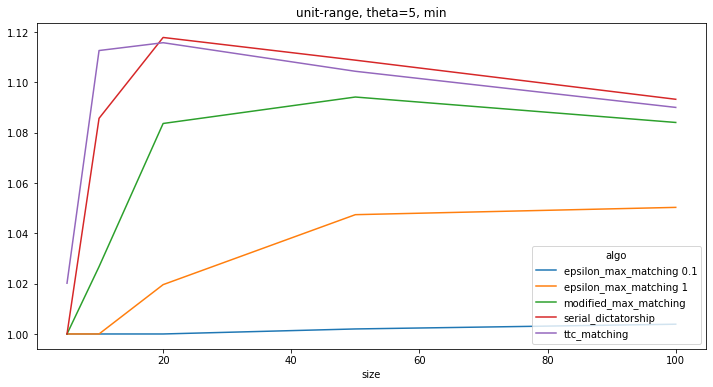

In [85]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, min')

In [86]:
curr = df_max[(df_max['valuation']=='theta5unitrange')]
curr = curr[curr['algo']!='updated_hybrid_max_matching']
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching 0.1,epsilon_max_matching 1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.009363,1.125876,1.325337,1.945662,1.945662
10,1.007018,1.106065,1.375435,1.578382,1.427041
20,1.008067,1.119758,1.255985,1.309839,1.310311
50,1.008513,1.083512,1.168503,1.181426,1.175348
100,1.008759,1.075141,1.125141,1.122444,1.122222


<AxesSubplot:title={'center':'unit-range, theta=5, max'}, xlabel='size'>

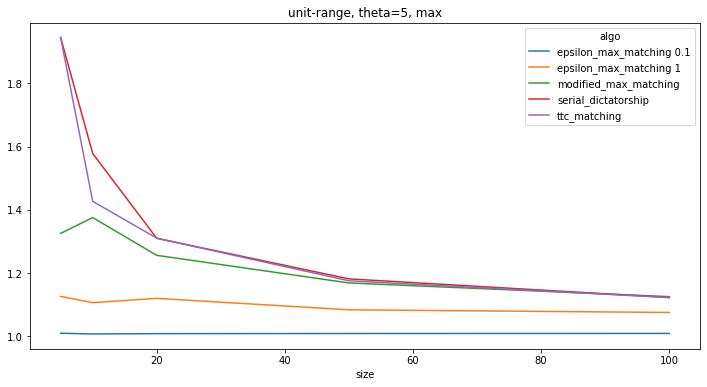

In [87]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, max')